# Importance of Data Visualization

To demonstrate the importance of data visualization for results interpretation we can use a collection of four datasets known as **Anscombe's quartet** (after an English statistician Francis Anscombe). Those datasets comprise 11 data points with particular properties: while the points themselves differ between the sets, their summary statistics are (nearly) exactly the same, i.e.: all those datasets have the same mean, standard deviation and regression line with the same parameters and R2 metric. And yet, the shape of the data differs widely between those, as we will see below.

###### Set up of the environment

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

# this is to silence pandas' warnings
import warnings
warnings.simplefilter(action='ignore')
    
%matplotlib inline

###### Load the dataset and analyze it

The *seaborn* library provides a method to read in this dataset directly:

In [2]:
quartet = sns.load_dataset("anscombe")

In [3]:
quartet.head() #display the first five records

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


We can now explore the summary metrics of the data. Let's look at the mean, standard deviation and linear regression equation.

In [4]:
quartet_grouped = quartet.groupby('dataset')

In [5]:
quartet_grouped.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


In [6]:
quartet_grouped.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


In [7]:
# fit a linear regression model for each dataset

for ds in quartet['dataset'].unique():
    dataset = quartet[quartet['dataset'] == ds]
    res = stats.linregress(dataset['x'], dataset['y'])
    print(
        f'Dataset {ds}:\ty={round(res.slope, 3)}x+{round(res.intercept, 3)}'
        f'\tR-coeff={round(res.rvalue**2, 3)}\tCorrelation-coeff={round(res.rvalue, 3)}'
    )

Dataset I:	y=0.5x+3.0	R-coeff=0.667	Correlation-coeff=0.816
Dataset II:	y=0.5x+3.001	R-coeff=0.666	Correlation-coeff=0.816
Dataset III:	y=0.5x+3.002	R-coeff=0.666	Correlation-coeff=0.816
Dataset IV:	y=0.5x+3.002	R-coeff=0.667	Correlation-coeff=0.817


As you can see, the numbers are nearly identical. Without visualizing the data it would be rather difficult to tell the datasets apart.

Let's try to look at the data using a scatter plot, including a regression line (automatically calculated by the `lmplot` function):

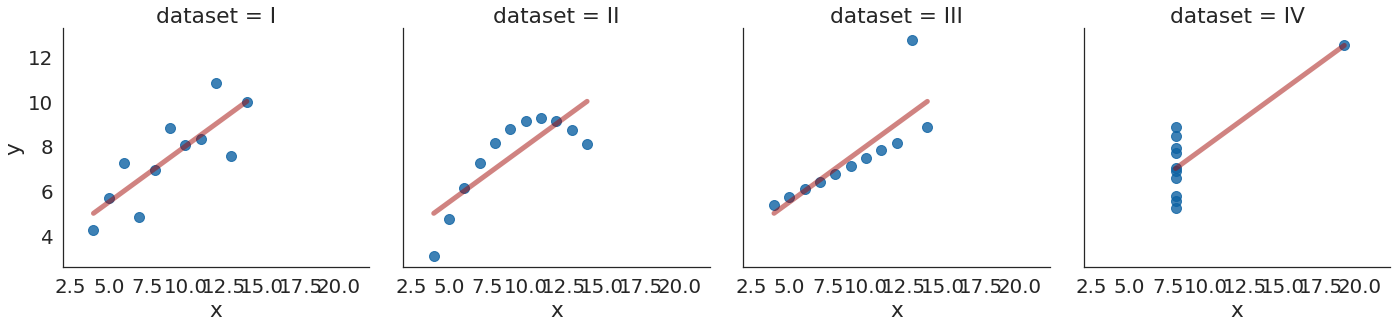

In [8]:
with sns.plotting_context("notebook", font_scale=1.8), sns.axes_style('white'):
    g = sns.lmplot(
        x="x", y="y", col="dataset", data=quartet, ci=None,
        scatter_kws={"s": 100, 'color': '#0D62A3'},
        line_kws={'linewidth': 5, 'color': '#A30905', 'alpha': 0.5})
    g.set(xlim=(2, 22))

Now, that is interesting. Each of those looks entirely differently - let's think about how we could interpret each of those datasets after visual inspection:

 1. resembles a typical linear relationship where the y variable is correlated with x (with a lot of Gaussian noise)
 2. there is a clear correlation between variables but not a linear one
 3. the relationship is evidently linear, with a single outlier (which is lowering the correlation coefficient from 1 to 0.816)
 4. there does not seem to be a relationship between the two variables, however the outlier again skews the correlation coefficient significantly

As you can see, according to the linear regression model parameters themselves those datasets look very similar, if not the same. It is only when we visualize them using a simple scatter plot we can see that those datasets differ significantly.

In the next sections, we will explore different visualization methods that will help us in the analysis of different datasets.